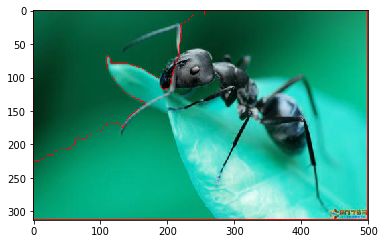

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 参考教程：https://blog.csdn.net/u010682375/article/details/72765064
img = cv2.imread('114.jpg')
# 图片灰度处理
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# threshold函数是二化值处理
# ret, dst = cv2.threshold(src, thresh, maxval, type)
# 参数说明：
# src：输入图，只能输入单通道图像，通常来说为灰度图
# dst：输出图
# thresh：阈值
# maxval：当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
# type：二值化操作的类型，包含以下5 种类型：cv2.THRESH_BINARY；cv2.THRESH_BINARY_INV；cv2.THRESH_TRUNC；cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# 生成3x3的核
kernel = np.ones((3, 3), np.uint8)
# morphologyEx函数是图像进行膨胀后再腐蚀的操作，去除噪声数据，参考https://blog.csdn.net/u010682375/article/details/70026569
# 参数src：二值化后的图像
# 参数op：形态运算的类型
# 参数iterations：腐蚀次数和膨胀次数
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# dilate函数是膨胀，与morphologyEx的作用相似
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# 确认背景区域位置，distanceTransform函数是距离变换，参考https://blog.csdn.net/liubing8609/article/details/78483667
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# threshold函数是二化值处理
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
# subtract计算两个数组或数组和标量之间的元素差异，这里计算背景和前景的差异值
unknown = cv2.subtract(sure_bg, sure_fg)

# 标记
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
# watershed实现分水岭算法
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]
# 显示图像
plt.imshow(img)
plt.show()